In [3]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm, datasets
from sklearn.datasets import load_iris  

In [5]:
#K_nearest neighbours uses proximity to determine which category a data point belongs to. K is the number of data points taken into consideration
iris = load_iris()

In [8]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

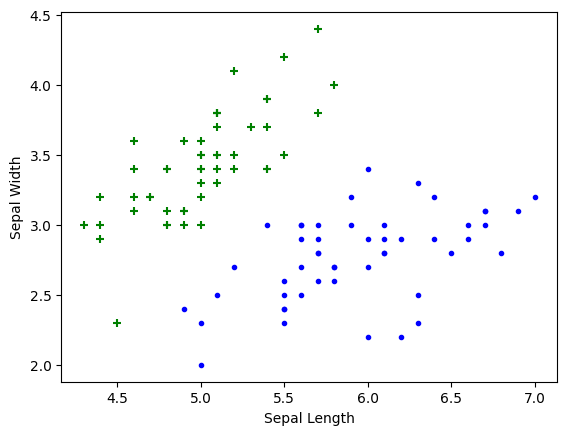

In [12]:
%matplotlib inline
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

In [13]:
x = df.drop(['target', 'flower_name'], axis = 'columns')
y = df['target']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xs,y,test_size = 0.25, random_state = 2) 

In [14]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [30]:
from sklearn.neighbors import KNeighborsClassifier
kl = KNeighborsClassifier(n_neighbors = 10)#Choose an ideal number of neighbors

In [31]:
kl.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [32]:
kl.score(xtrain,ytrain)


0.9732142857142857

In [33]:
kl.score(xtest,ytest)

0.9473684210526315

In [34]:
kl.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [35]:
from sklearn.metrics import confusion_matrix
y_predict = kl.predict(xtest)

In [36]:
cm = confusion_matrix(ytest,y_predict)

Text(58.222222222222214, 0.5, 'Truth')

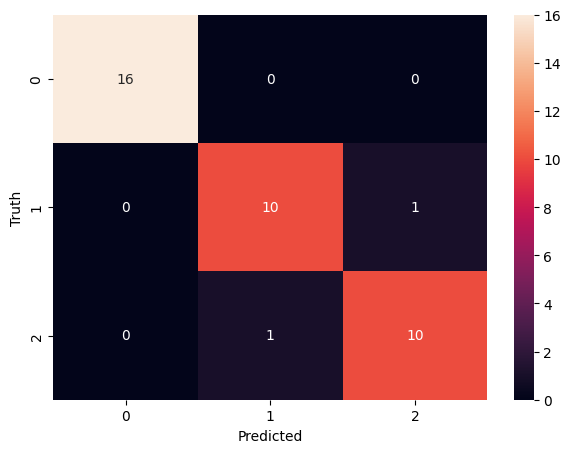

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [41]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [42]:
df = pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [44]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [45]:
x = df.drop(['target'], axis = 'columns')
y = df['target']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25, random_state = 2)

In [65]:
kn = KNeighborsClassifier(n_neighbors=3)#After trial and error, 3 neighbours deals the most accurate values

In [66]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [67]:
kn.score(xtest,ytest)

0.9866666666666667

In [69]:
from sklearn.metrics import confusion_matrix
y_predict = kn.predict(xtest)
cmm = confusion_matrix(ytest,y_predict)

Text(58.222222222222214, 0.5, 'Truth')

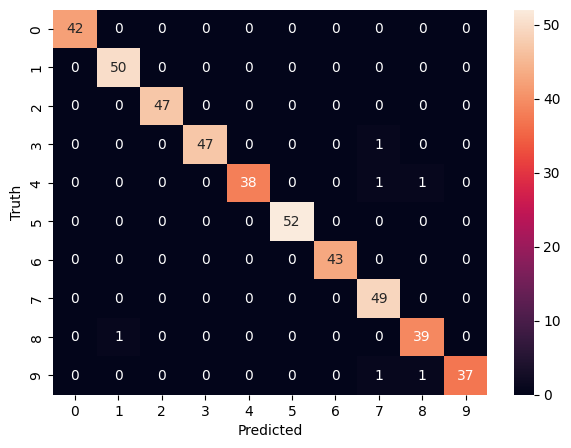

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cmm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       1.00      0.98      0.99        48
           4       1.00      0.95      0.97        40
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        43
           7       0.94      1.00      0.97        49
           8       0.95      0.97      0.96        40
           9       1.00      0.95      0.97        39

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

